<a href="https://colab.research.google.com/github/lazy-wolf/TME_6015/blob/main/A2_TensorFlow_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 28-10-2023
```

**Delivarable_1 : Create your own separate python notebooks in Colab for each of the three sources.**




**Creating separate python notebooks in Colab for using pre-trained model and dataset from Tensorflow**

**Import Libraries**

In [ ]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

**Importing Dataset from TensorFlow Datasets**




In [ ]:
(training_set, validation_set), dataset_info = tfds.load(
    'imagewang/160px',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/14669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteZJ0AM1/imagewang-train.tfrecord*...:   0%|…

Generating validation examples...:   0%|          | 0/3929 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteZJ0AM1/imagewang-validation.tfrecord*...: …

Dataset imagewang downloaded and prepared to /root/tensorflow_datasets/imagewang/160px/2.0.0. Subsequent calls will reuse this data.


**Dataset Info**

[imagewang datset link](https://www.tensorflow.org/datasets/catalog/imagewang#imagewang160px)

*https://www.tensorflow.org/datasets/catalog/imagewang#imagewang160px*

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='imagewang',
    full_name='imagewang/160px/2.0.0',
    description="""
    Imagewang contains Imagenette and Imagewoof combined Image网 (pronounced
    "Imagewang"; 网 means "net" in Chinese) contains Imagenette and Imagewoof
    combined, but with some twists that make it into a tricky semi-supervised
    unbalanced classification problem:
    
    *   The validation set is the same as Imagewoof (i.e. 30% of Imagewoof images);
        there are no Imagenette images in the validation set (they're all in the
        training set)
    *   Only 10% of Imagewoof images are in the training set!
    *   The remaining are in the unsup ("unsupervised") directory, and you can not
        use their labels in training!
    *   It's even hard to type and hard to say!
    
    The dataset comes in three variants:
    
    *   Full size
    *   320 px
    *   160 px
    
    This dataset consists of the Imagenette dataset {size} variant.
    """,
    config_description

**Data Preprocessing and Data Analysis**

In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=20)

In [ ]:
dataset_info.features['label'].num_classes

20

In [ ]:
num_classes = dataset_info.features['label'].num_classes

In [ ]:
dataset_info.features['label'].names

['n03394916',
 'n03417042',
 'n02089973',
 'n02086240',
 'n02105641',
 'n02087394',
 'n02099601',
 'n02115641',
 'n03445777',
 'n02102040',
 'n03425413',
 'n03888257',
 'n03028079',
 'n03000684',
 'n01440764',
 'n02093754',
 'n02111889',
 'n02096294',
 'n02088364',
 'n02979186']

In [ ]:
for i in training_set:
  print(i[1].numpy())
  break

19


In [ ]:
len(training_set)

10268

In [ ]:
len(validation_set)

4401

In [ ]:
training_dict={}
for i in training_set:
  if dataset_info.features['label'].names[i[1].numpy()] not in training_dict:
    training_dict[dataset_info.features['label'].names[i[1].numpy()]]=1
  else:
    training_dict[dataset_info.features['label'].names[i[1].numpy()]]+=1


In [ ]:
training_df=pd.DataFrame(training_dict.items(),columns=['Labels','Count'])

In [ ]:
training_df['Count'].sum()

10268

In [ ]:
num_training_examples = training_df['Count'].sum()

<Axes: xlabel='Labels'>

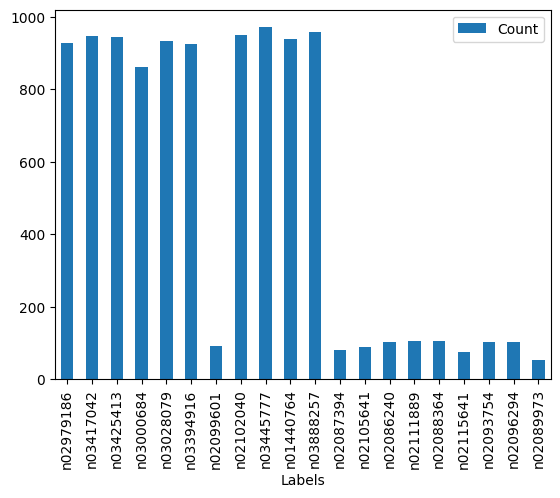

In [ ]:
training_df.plot.bar(x="Labels", y="Count", rot=90)


In [ ]:
validation_dict={}
for i in validation_set:
  if dataset_info.features['label'].names[i[1].numpy()] not in validation_dict:
    validation_dict[dataset_info.features['label'].names[i[1].numpy()]]=1
  else:
    validation_dict[dataset_info.features['label'].names[i[1].numpy()]]+=1

In [ ]:
validation_df=pd.DataFrame(validation_dict.items(),columns=['Labels','Count'])

In [ ]:
validation_df['Count'].sum()

4401

In [ ]:
num_validation_examples = validation_df['Count'].sum()

<Axes: xlabel='Labels'>

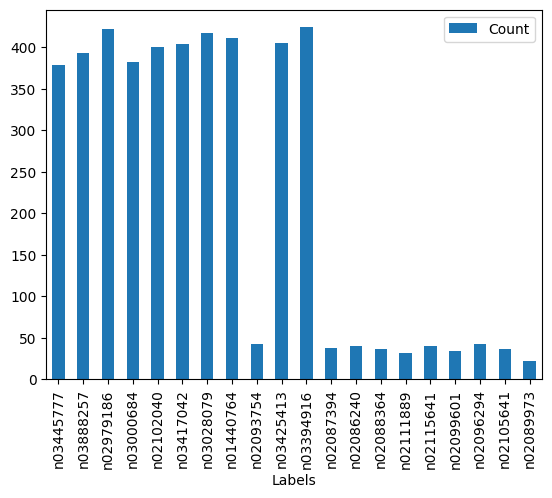

In [ ]:
validation_df.plot.bar(x="Labels", y="Count", rot=90)

In [ ]:
class_names = np.array(dataset_info.features['label'].names)

**Showing Examples of Dataset**

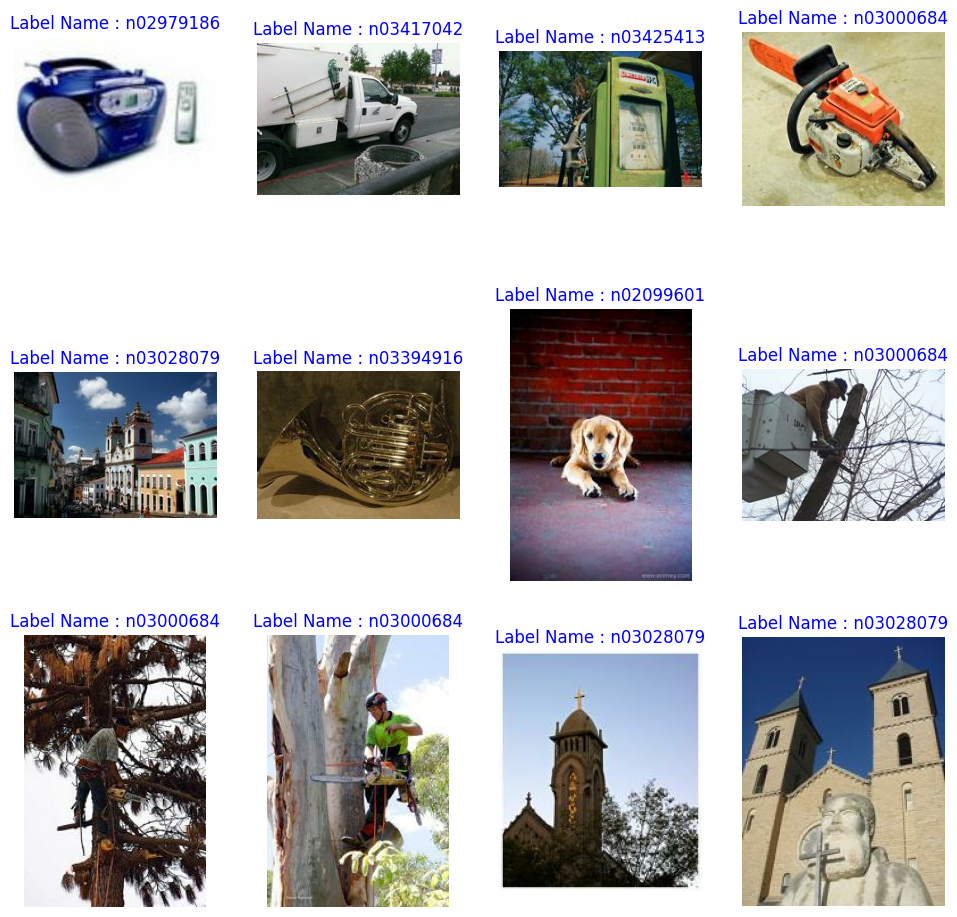

In [ ]:
plt.figure(figsize=(12, 12))
count = 0
for images, labels in training_set:
      ax = plt.subplot(3, 4, count + 1)
      plt.imshow(images.numpy().astype("uint8"))
      plt.title(f"Label Name : {class_names[labels.numpy()]}", color = "blue")
      plt.axis("off")
      count+=1
      if count == 12:
        break


In [ ]:
IMAGE_RES = 128
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


**Create a Model from TensorFlow Hub**

[mobilenet-v2 link from tensorflow hub](https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/5)

*https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/5*

In [ ]:
URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/5"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 20)                20040     
                                                                 
Total params: 1712529 (6.53 MB)
Trainable params: 20040 (78.28 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


**Compile and Train the Model**

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [ ]:
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:
history_1= model.fit(train_batches, epochs=20, validation_data= validation_batches,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
321/321 [==============================] - 36s 103ms/step - loss: 0.6128 - accuracy: 0.8285 - val_loss: 0.3797 - val_accuracy: 0.8855 - lr: 0.0010
Epoch 2/20
321/321 [==============================] - 32s 100ms/step - loss: 0.2919 - accuracy: 0.9108 - val_loss: 0.3925 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 3/20
321/321 [==============================] - ETA: 0s - loss: 0.2235 - accuracy: 0.9309
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
321/321 [==============================] - 32s 101ms/step - loss: 0.2235 - accuracy: 0.9309 - val_loss: 0.3915 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 4/20
321/321 [==============================] - 32s 100ms/step - loss: 0.1521 - accuracy: 0.9537 - val_loss: 0.3641 - val_accuracy: 0.8996 - lr: 5.0000e-04
Epoch 5/20
321/321 [==============================] - 32s 100ms/step - loss: 0.1314 - accuracy: 0.9627 - val_loss: 0.3731 - val_accuracy: 0.8925 - lr: 5.0000e-04
Epoch 6/20
321/321 [=====================

**Evaluate the Model**

In [ ]:
loss, accuracy= model.evaluate(validation_batches)
print(f"loss is: {loss}")
print(f"accuacy is: {accuracy}")

138/138 [==============================] - 10s 69ms/step - loss: 0.3641 - accuracy: 0.8996
loss is: 0.36412137746810913
accuacy is: 0.8995682597160339


In [ ]:
history_mobilenet_v2= pd.DataFrame(history_1.history)
history_mobilenet_v2.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.612813,0.828496,0.379687,0.885481,0.0010
1,0.291873,0.910791,0.392528,0.887298,0.0010
2,0.223487,0.930853,0.391515,0.891161,0.0010
3,0.152075,0.953740,0.364121,0.899568,0.0005
4,0.131382,0.962700,0.373052,0.892524,0.0005


**Plot Training History**

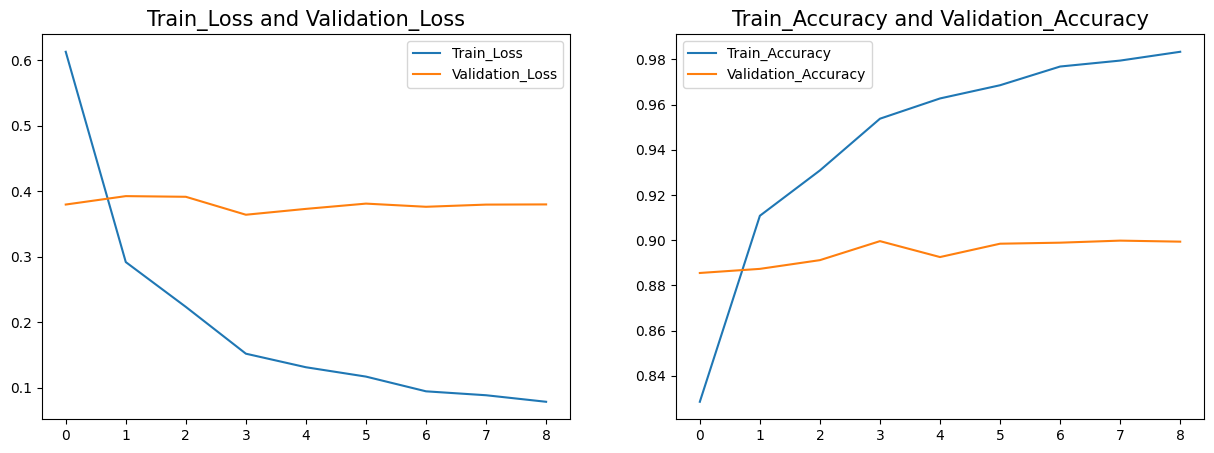

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v2['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v2['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v2['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v2['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model Accuracy**

In [ ]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in validation_batches:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

138/138 [==============================] - 12s 81ms/step


**Accuracy Score of Model on Test Dataset**

In [ ]:
accuracy_score(y_test, y_pred)*100

89.95682799363782

In [ ]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['n03394916' 'n03417042' 'n02089973' 'n02086240' 'n02105641' 'n02087394'
 'n02099601' 'n02115641' 'n03445777' 'n02102040' 'n03425413' 'n03888257'
 'n03028079' 'n03000684' 'n01440764' 'n02093754' 'n02111889' 'n02096294'
 'n02088364' 'n02979186']


**Delivarable_3 : Show a few examples of the predicted output**

**Showing Examples of Predicted Output**

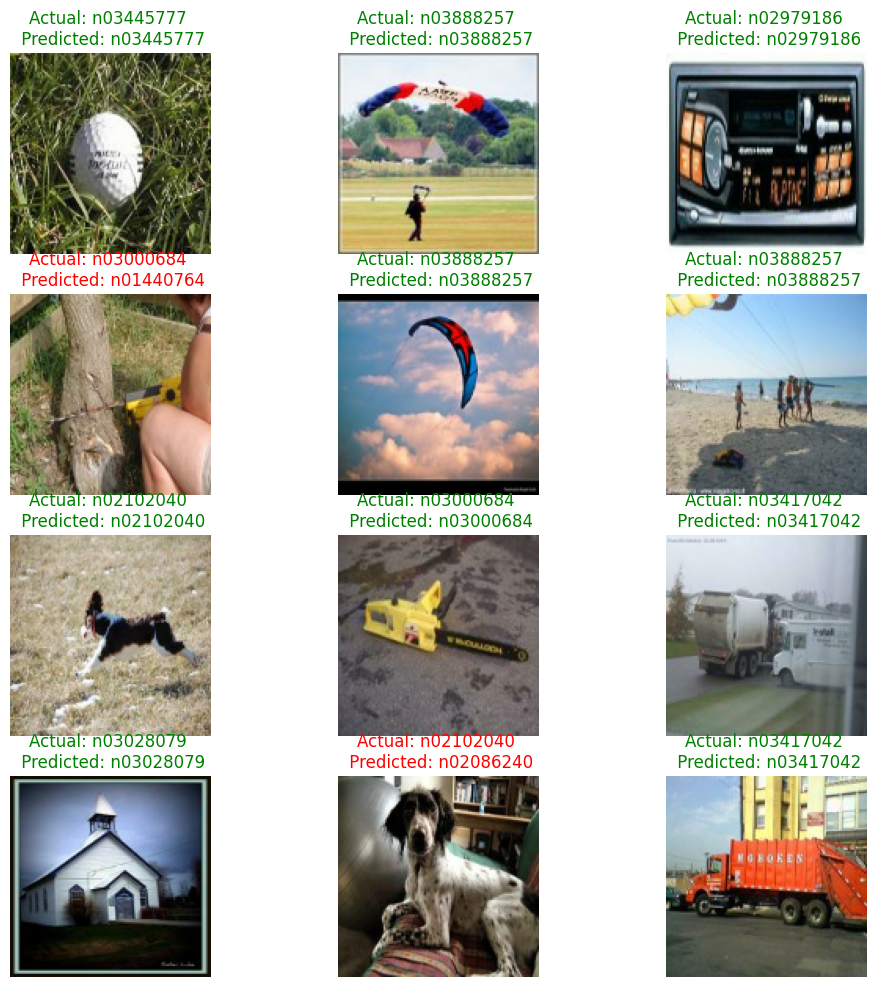

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i])
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [ ]:
f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.7991600103594283
Precision:0.7927809186999623
Recall:0.8098080918898602


In [ ]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [ ]:
y_test_labels[:5]

['n03445777', 'n03888257', 'n02979186', 'n03000684', 'n03888257']

In [ ]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [ ]:
y_pred_labels[:5]

['n03445777', 'n03888257', 'n02979186', 'n01440764', 'n03888257']

**Classification Report**

In [ ]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
              precision    recall  f1-score   support

   n01440764       0.98      0.96      0.97       411
   n02086240       0.77      0.75      0.76        40
   n02087394       0.66      0.71      0.68        38
   n02088364       0.50      0.42      0.45        36
   n02089973       0.42      0.45      0.43        22
   n02093754       0.74      0.74      0.74        42
   n02096294       0.86      0.86      0.86        43
   n02099601       0.64      0.74      0.68        34
   n02102040       0.88      0.92      0.90       400
   n02105641       0.84      0.57      0.68        37
   n02111889       0.89      0.78      0.83        32
   n02115641       0.72      0.65      0.68        40
   n02979186       0.92      0.93      0.93       422
   n03000684       0.83      0.85      0.84       382
   n03028079       0.93      0.95      0.94       417
   n03394916       0.90      0.92      0.91       424
   n03417042       0.91      0.91  

**Delivarable_2 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


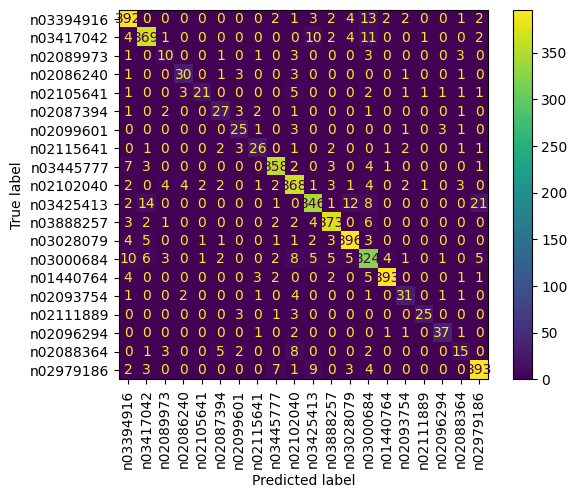

In [ ]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()